# Differentiate sessions

In [1]:
import pandas as pd
import numpy as np
import json
import pickle

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('../Cole.mplstyle')

from collections import defaultdict
from sklearn import svm
from sklearn import metrics
import lightgbm as lgb
import glob
from scipy.stats import zscore

/Users/scott/anaconda/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
pd.options.display.max_rows=100

# Load feature matrix

In [4]:
df_feat = pd.read_csv('../processed_data/lgbm_v4_feat_matrix.csv', index_col=0)

### Impute NaN

In [5]:
# Get values to impute
df_train_all = df_feat.copy()
df_train_all.drop(['user', 'sess', 'task', 'trial'], inplace=True, axis=1)
imputing_dict = dict(df_train_all.mean())

# Impute
for col in imputing_dict.keys():
    df_feat[col].fillna(imputing_dict[col], inplace=True)

### Normalize

In [10]:
# Normalize features
df_feat_norm = df_feat.apply(zscore)
df_feat_norm[['user', 'sess', 'task', 'trial']] = df_feat[['user', 'sess', 'task', 'trial']]

# tSNE

In [7]:

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [8]:
user_use = 3

# Compute feat matrix
df_temp = df_feat_norm[df_feat_norm['user'] == user_use]
y = df_temp['sess'].values
df_temp = df_temp.drop(['user', 'sess', 'task', 'trial'], axis=1)
X = df_temp.values

# Apply pca
pca = PCA(n_components=100)
pca.fit(X)
X_pca = pca.transform(X)
print('Explained variance:', sum(pca.explained_variance_ratio_))

# Compute tsne
tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(X_pca)

Explained variance: 0.8645974562283684


([], <a list of 0 Text yticklabel objects>)

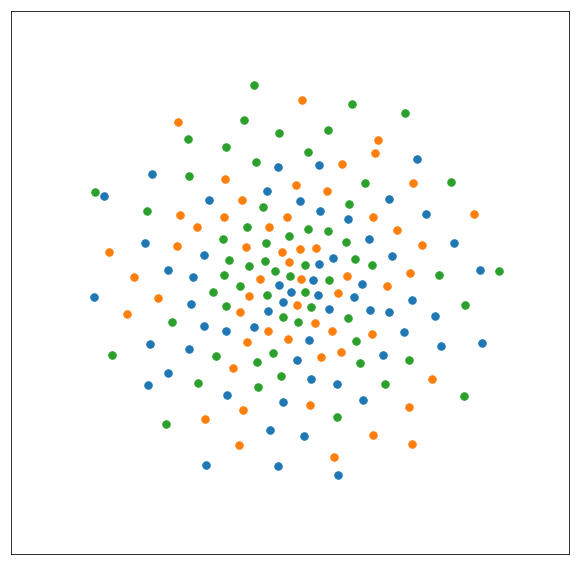

In [11]:
# Visualize
plt.figure(figsize=(10,10))
for keyboard_i in np.unique(y):
    idx_use = y == keyboard_i
    plt.plot(X_embedded[idx_use, 0], X_embedded[idx_use, 1], '.', ms=15)
plt.xlim((-150,150))
plt.ylim((-150,150))
plt.xticks([])
plt.yticks([])